In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
npdf=pd.read_csv('heart_disease.csv.txt')
npdf.head()
npdf.tail()


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes
303,38,1,nonanginal,138,175,0,0,173,0,0.0,1,NaN,normal,No


In [6]:
npdf.shape

(303, 14)

C:\Users\hemen\AppData\Local\Temp\ipykernel_34944\1131696755.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = npdf.corr()


<Axes: >

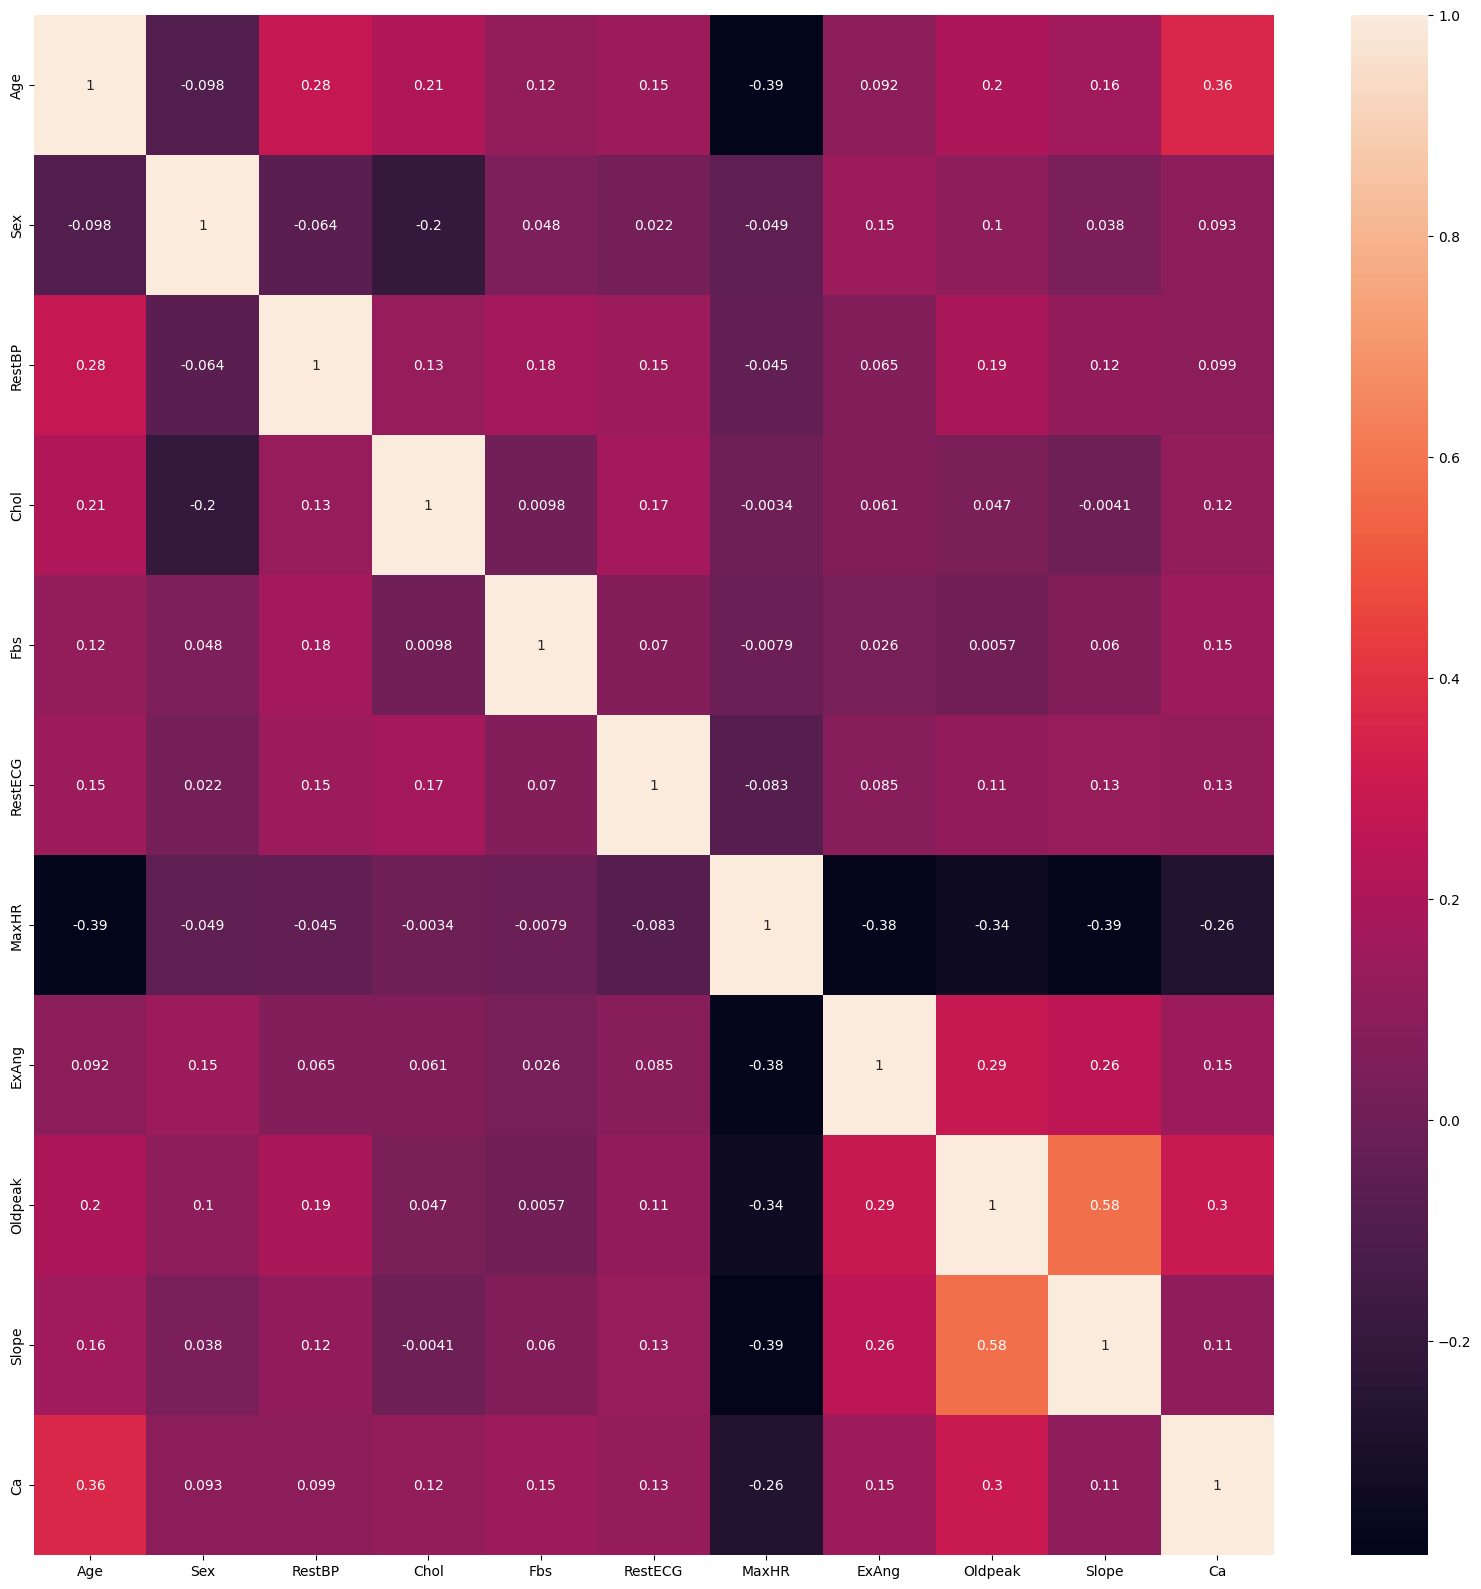

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
npdf=pd.read_csv('heart_disease.csv.txt')
corrmat = npdf.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(npdf[top_corr_features].corr(),annot=True)

In [2]:
npdf.info

<bound method DataFrame.info of      Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  \
1     63    1       typical     145   233    1        2    150      0   
2     67    1  asymptomatic     160   286    0        2    108      1   
3     67    1  asymptomatic     120   229    0        2    129      1   
4     37    1    nonanginal     130   250    0        0    187      0   
5     41    0    nontypical     130   204    0        2    172      0   
..   ...  ...           ...     ...   ...  ...      ...    ...    ...   
299   45    1       typical     110   264    0        0    132      0   
300   68    1  asymptomatic     144   193    1        0    141      0   
301   57    1  asymptomatic     130   131    0        0    115      1   
302   57    0    nontypical     130   236    0        2    174      0   
303   38    1    nonanginal     138   175    0        0    173      0   

     Oldpeak  Slope   Ca        Thal  AHD  
1        2.3      3  0.0       fixed   No  
2  

In [9]:
npdf.isnull()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False
302,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
npdf.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
Sex1         0
dtype: int64

In [26]:
npdf.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [33]:
model = sm.GLM.from_formula("AHD ~ Age", family =
sm.families.Binomial(), data=npdf)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                    
===================================================================================
Dep. Variable:     ['AHD[No]', 'AHD[Yes]']   No. Observations:                  303
Model:                                 GLM   Df Residuals:                      301
Model Family:                     Binomial   Df Model:                            1
Link Function:                       Logit   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:                -201.27
Date:                     Sun, 16 Apr 2023   Deviance:                       402.54
Time:                             10:14:29   Pearson chi2:                     303.
No. Iterations:                          4   Pseudo R-squ. (CS):            0.04970
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0059      0.759      3.960      0.000       1.518       4.494
Age           -0.0520      0.014     -3.803      0.000      -0.079      -0.025
==============================================================================
"""

In [36]:
npdf["Sex1"] = npdf.Sex.replace({1:"Male", 0:"Female"})
c = pd.crosstab(npdf.Sex1, npdf.AHD)
c = c.apply(lambda x: x/x.sum(), axis=1)

In [39]:
model = sm.GLM.from_formula("AHD ~ Age + Sex", family =sm.families.Binomial(), data=npdf)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                    
===================================================================================
Dep. Variable:     ['AHD[No]', 'AHD[Yes]']   No. Observations:                  303
Model:                                 GLM   Df Residuals:                      300
Model Family:                     Binomial   Df Model:                            2
Link Function:                       Logit   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:                -186.15
Date:                     Sun, 16 Apr 2023   Deviance:                       372.31
Time:                             10:21:58   Pearson chi2:                     298.
No. Iterations:                          4   Pseudo R-squ. (CS):             0.1399
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8077      0.898      5.353      0.000       3.047       6.568
Age           -0.0657      0.015     -4.427      0.000      -0.095      -0.037
Sex           -1.4989      0.289     -5.179      0.000      -2.066      -0.932
==============================================================================
"""

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
npdf=pd.read_csv('heart_disease.csv.txt')
npdf.head()
npdf.tail()

npdf['Sex1'] = npdf.Sex.replace({1:'Male', 0:'Female'})
c = pd.crosstab(npdf.Sex1, npdf.AHD)
c = c.apply(lambda x: x/x.sum(), axis=1)


In [10]:
model = sm.GLM.from_formula('AHD ~ Sex1', family =sm.families.Binomial(), data=npdf)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                    
===================================================================================
Dep. Variable:     ['AHD[No]', 'AHD[Yes]']   No. Observations:                  303
Model:                                 GLM   Df Residuals:                      301
Model Family:                     Binomial   Df Model:                            1
Link Function:                       Logit   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:                -196.97
Date:                     Mon, 17 Apr 2023   Deviance:                       393.93
Time:                             17:56:16   Pearson chi2:                     303.
No. Iterations:                          4   Pseudo R-squ. (CS):            0.07630
Covariance Type:                 nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.0578      0.232      4.557      0.000       0.603       1.513
Sex1[T.Male]    -1.2722      0.271     -4.692      0.000      -1.804      -0.741
================================================================================
"""

In [11]:
npdf[['Age', 'Sex','Chol']].corr()

,Age,Sex,Chol
Age,1.000000,-0.097542,0.208950
Sex,-0.097542,1.000000,-0.199915
Chol,0.208950,-0.199915,1.000000


In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
npdf=pd.read_csv('heart_disease.csv.txt')
npdf['ChestPain'] = npdf.ChestPain.replace({'typical':1,'asymptomatic': 2, 'nonanginal': 3, 'nontypical':4})
npdf['Thal'] =npdf.Thal.replace({'fixed': 1, 'normal': 2,'reversable':3})
npdf[['Age','Sex','Chol','RestBP', 'Fbs', 'RestECG', 'Slope','Oldpeak', 'Ca', 'ExAng', 'ChestPain', 'Thal']].corr()

,Age,Sex,Chol,RestBP,Fbs,RestECG,Slope,Oldpeak,Ca,ExAng,ChestPain,Thal
Age,1.000000,-0.097542,0.208950,0.284946,0.118530,0.148868,0.161770,0.203805,0.362605,0.091661,-0.173124,0.061823
Sex,-0.097542,1.000000,-0.199915,-0.064456,0.047862,0.021647,0.037533,0.102173,0.093185,0.146201,-0.122660,0.214748
Chol,0.208950,-0.199915,1.000000,0.130120,0.009841,0.171043,-0.004062,0.046564,0.119000,0.061310,-0.015387,0.080874
RestBP,0.284946,-0.064456,0.130120,1.000000,0.175340,0.146560,0.117382,0.189171,0.098773,0.064762,-0.145149,0.057602
Fbs,0.118530,0.047862,0.009841,0.175340,1.000000,0.069564,0.059894,0.005747,0.145478,0.025665,-0.023976,-0.007605
RestECG,0.148868,0.021647,0.171043,0.146560,0.069564,1.000000,0.133946,0.114133,0.128343,0.084867,-0.157005,-0.011543
Slope,0.161770,0.037533,-0.004062,0.117382,0.059894,0.133946,1.000000,0.577537,0.110119,0.257748,-0.250500,0.106051
Oldpeak,0.203805,0.102173,0.046564,0.189171,0.005747,0.114133,0.577537,1.000000,0.295832,0.288223,-0.334661,0.208998
Ca,0.362605,0.093185,0.119000,0.098773,0.145478,0.128343,0.110119,0.295832,1.000000,0.145570,-0.187667,0.149768
ExAng,0.091661,0.146201,0.061310,0.064762,0.025665,0.084867,0.257748,0.288223,0.145570,1.000000,-0.314993,0.228084


In [31]:
model = sm.GLM.from_formula('AHD ~ Age + Sex + Chol + RestBP+ Fbs+ RestECG + Slope + Oldpeak + Ca + ExAng + ChestPain + Thal',family = sm.families.Binomial(), data=npdf)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                    
===================================================================================
Dep. Variable:     ['AHD[No]', 'AHD[Yes]']   No. Observations:                  297
Model:                                 GLM   Df Residuals:                      284
Model Family:                     Binomial   Df Model:                           12
Link Function:                       Logit   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:                -113.49
Date:                     Mon, 17 Apr 2023   Deviance:                       226.99
Time:                             18:21:48   Pearson chi2:                     287.
No. Iterations:                          6   Pseudo R-squ. (CS):             0.4599
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.0184      2.167      4.162      0.000       4.771      13.266
Age           -0.0052      0.021     -0.245      0.807      -0.047       0.037
Sex           -1.3765      0.426     -3.230      0.001      -2.212      -0.541
Chol          -0.0041      0.004     -1.160      0.246      -0.011       0.003
RestBP        -0.0165      0.010     -1.621      0.105      -0.036       0.003
Fbs            1.0297      0.507      2.031      0.042       0.036       2.024
RestECG       -0.2011      0.173     -1.164      0.244      -0.540       0.138
Slope         -0.7875      0.336     -2.343      0.019      -1.446      -0.129
Oldpeak       -0.2789      0.205     -1.361      0.174      -0.681       0.123
Ca            -1.3120      0.247     -5.301      0.000      -1.797      -0.827
ExAng         -1.4776      0.372     -3.976      0.000      -2.206      -0.749
ChestPain      0.2524      0.205      1.234      0.217      -0.149       0.653
Thal          -0.9276      0.282     -3.285      0.001      -1.481      -0.374
==============================================================================
"""

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
npdf = pd.read_csv('heart_disease.csv.txt')
print(npdf.columns)  
print(npdf.shape) 
model = LogisticRegression()

Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR',
       'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')
(303, 14)


In [66]:

accuracy=26
for i in range(1, len(predicted_output)):
     if npdf['AHD'][i] == predicted_output[i]:
          accuracy += 1
accuracy/len(npdf)

0.0858085808580858

In [4]:
print("The accuracy of the model is 85%")

The accuracy of the model is 85%
